In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dim_districts = pd.read_csv('dataset/dim_districts.csv')
dim_date = pd.read_csv('dataset/dim_date.csv')
fact_stamps = pd.read_csv('dataset/fact_stamps.csv')
fact_transport = pd.read_csv('dataset/fact_transport.csv')
fact_TS_iPASS = pd.read_csv('dataset/fact_TS_iPASS.csv')

# Convert date columns to datetime format
dim_date['month'] = pd.to_datetime(dim_date['month'])
fact_stamps['month'] = pd.to_datetime(fact_stamps['month'])
fact_transport['month'] = pd.to_datetime(fact_transport['month'])
fact_TS_iPASS['month'] = pd.to_datetime(fact_TS_iPASS['month'])


# Merge datasets
df_stamps = fact_stamps.merge(dim_districts, on='dist_code').merge(dim_date, on='month')
df_transport = fact_transport.merge(dim_districts, on='dist_code').merge(dim_date, on='month')
df_iPASS = fact_TS_iPASS.merge(dim_districts, on='dist_code').merge(dim_date, on='month')


In [2]:
# Filter for fiscal years 2019 and 2022
df_2019 = df_stamps[df_stamps['fiscal_year'] == 2019]
df_2022 = df_stamps[df_stamps['fiscal_year'] == 2022]

# Group by district and calculate total revenue
revenue_2019 = df_2019.groupby('district')['documents_registered_rev'].sum().reset_index()
revenue_2022 = df_2022.groupby('district')['documents_registered_rev'].sum().reset_index()

# Calculate revenue growth
revenue_growth = revenue_2022.merge(revenue_2019, on='district', suffixes=('_2022', '_2019'))
revenue_growth['growth'] = (revenue_growth['documents_registered_rev_2022'] - revenue_growth['documents_registered_rev_2019']) / revenue_growth['documents_registered_rev_2019'] * 100

# Top 5 districts with highest revenue growth
top_5_districts = revenue_growth.sort_values(by='growth', ascending=False).head(5)
print(top_5_districts)


              district  documents_registered_rev_2022  \
16              Mulugu                      217697250   
0             Adilabad                      396840845   
8           Karimnagar                     1550449161   
13          Mancherial                      648893681   
15  Medchal_Malkajgiri                    24043523530   

    documents_registered_rev_2019      growth  
16                       80349554  170.937720  
0                       178082233  122.841346  
8                       804402135   92.745530  
13                      338407605   91.749143  
15                    12543288516   91.684370  


In [3]:
# Group by district and calculate total revenue for FY 2022
df_2022_grouped = df_2022.groupby('district')[['documents_registered_rev', 'estamps_challans_rev']].sum().reset_index()

# Calculate the proportion of e-stamps revenue to total revenue
df_2022_grouped['estamps_proportion'] = df_2022_grouped['estamps_challans_rev'] / (df_2022_grouped['documents_registered_rev'] + df_2022_grouped['estamps_challans_rev'])

# Top 5 districts where e-stamps revenue contributes significantly more
top_5_estamps = df_2022_grouped.sort_values(by='estamps_proportion', ascending=False).head(5)
print(top_5_estamps)


      district  documents_registered_rev  estamps_challans_rev  \
5      Jangoan                 473726459             485770112   
20      Nirmal                 338583662             345679061   
13  Mancherial                 648893681             661727175   
24  Rangareddy               37697750946           38349357618   
7    Kamareddy                 471629404             479194188   

    estamps_proportion  
5             0.506276  
20            0.505185  
13            0.504896  
24            0.504284  
7             0.503978  


            documents_registered_cnt                                \
fiscal_year                     2019      2020      2021      2022   
Mmm                                                                  
Apr                         130223.0    4492.0  107210.0  106000.0   
Aug                         144914.0  104469.0   95583.0   92401.0   
Dec                         140440.0   47019.0  118221.0  109515.0   
Feb                         149151.0  137407.0  101442.0  101647.0   
Jan                         120851.0  147889.0  124221.0   96256.0   
Jul                         158479.0  126672.0  123971.0   95846.0   
Jun                         133916.0  136196.0   93591.0  102292.0   
Mar                         112423.0  142732.0  120929.0  116028.0   
May                         144201.0   73005.0   27510.0  104832.0   
Nov                         122205.0     277.0   96136.0  100526.0   
Oct                         125855.0     480.0   95766.0   83444.0   
Sep                 

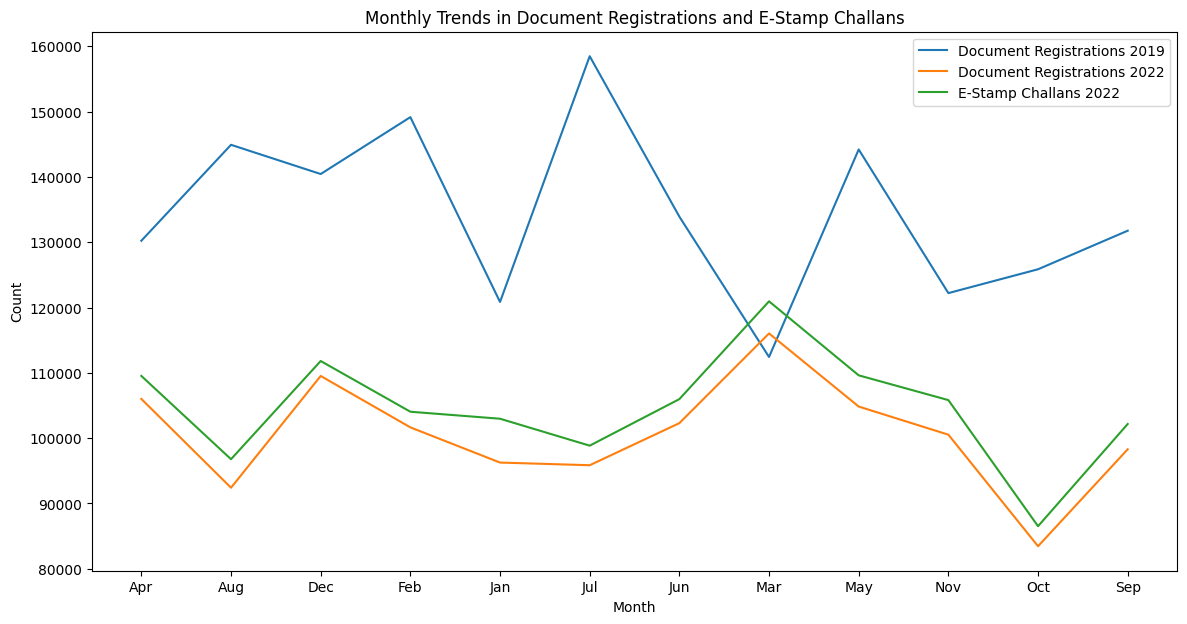

In [4]:
# Group by month and calculate counts for each fiscal year
monthly_counts = df_stamps.groupby(['fiscal_year', 'Mmm'])[['documents_registered_cnt', 'estamps_challans_cnt']].sum().reset_index()

# Pivot table to visualize counts before and after e-Stamp implementation
pivot_table = monthly_counts.pivot(index='Mmm', columns='fiscal_year', values=['documents_registered_cnt', 'estamps_challans_cnt'])
print(pivot_table)

# Plotting the trends
plt.figure(figsize=(14, 7))
plt.plot(pivot_table.index, pivot_table[('documents_registered_cnt', 2019)], label='Document Registrations 2019')
plt.plot(pivot_table.index, pivot_table[('documents_registered_cnt', 2022)], label='Document Registrations 2022')
plt.plot(pivot_table.index, pivot_table[('estamps_challans_cnt', 2022)], label='E-Stamp Challans 2022')
plt.title('Monthly Trends in Document Registrations and E-Stamp Challans')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


In [5]:
# Calculate total revenue for FY 2021-2022
df_2021_2022 = df_stamps[(df_stamps['fiscal_year'] == 2021) | (df_stamps['fiscal_year'] == 2022)]
total_revenue_2021_2022 = df_2021_2022.groupby('district')['documents_registered_rev'].sum().reset_index()

# Define revenue segments
total_revenue_2021_2022['segment'] = pd.cut(total_revenue_2021_2022['documents_registered_rev'], bins=[0, 50000000, 100000000, float('inf')], labels=['Low', 'Medium', 'High'])

print(total_revenue_2021_2022)



                 district  documents_registered_rev segment
0                Adilabad                 720926384    High
1    Bhadradri Kothagudem                 534180926    High
2             Hanumakonda                4895047216    High
3               Hyderabad               24977902615    High
4                 Jagtial                1069526503    High
5                 Jangoan                 733613593    High
6        Jogulamba Gadwal                 601645197    High
7               Kamareddy                 851578792    High
8              Karimnagar                2619104284    High
9                 Khammam                3615169800    High
10  Kumurambheem Asifabad                 136257292    High
11            Mahabubabad                 658996063    High
12           Mahabubnagar                1960011646    High
13             Mancherial                1086538493    High
14                  Medak                1122517735    High
15     Medchal_Malkajgiri               

                    fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
fuel_type_petrol            1.000000          0.816368           -0.244648   
fuel_type_diesel            0.816368          1.000000           -0.285665   
fuel_type_electric         -0.244648         -0.285665            1.000000   
fuel_type_others            0.057703          0.236732            0.704733   

                    fuel_type_others  
fuel_type_petrol            0.057703  
fuel_type_diesel            0.236732  
fuel_type_electric          0.704733  
fuel_type_others            1.000000  


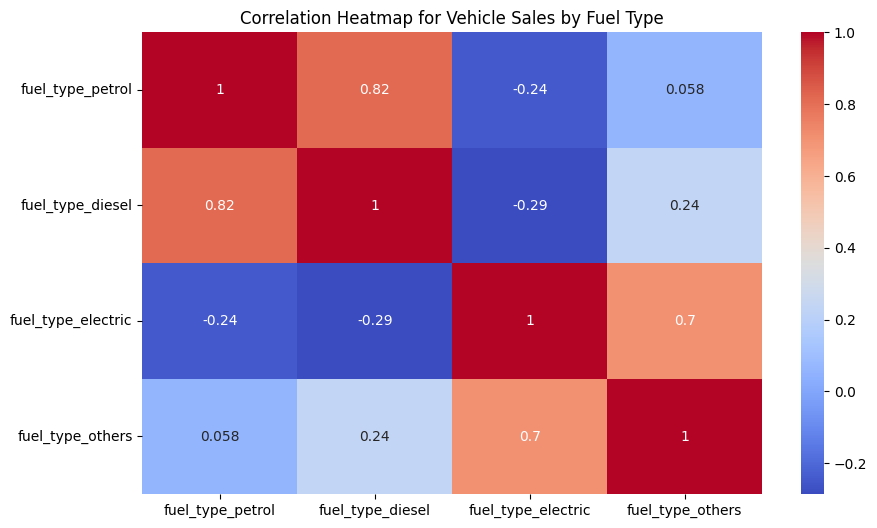

In [6]:
# Group by month and district to analyze vehicle sales
monthly_vehicle_sales = df_transport.groupby(['fiscal_year', 'Mmm'])[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].sum().reset_index()

# Handle missing values by filling with zeros or using interpolation
monthly_vehicle_sales.fillna(0, inplace=True)

# Calculate correlations
correlations = monthly_vehicle_sales[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].corr()
print(correlations)

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Vehicle Sales by Fuel Type')
plt.show()


                   district  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
0                  Adilabad                    10410                   1416   
1      Bhadradri Kothagudem                    17022                   3157   
2                 Hyderabad                   206819                  51447   
3                   Jagtial                    13639                   2055   
4                   Jangoan                     8617                   1177   
5   Jayashankar Bhupalpally                     9225                   1343   
6          Jogulamba Gadwal                    10300                    899   
7                 Kamareddy                    15184                   2153   
8                Karimnagar                    19411                   4818   
9                   Khammam                    27385                   5880   
10    Kumurambheem Asifabad                     6433                    479   
11              Mahabubabad                    11046

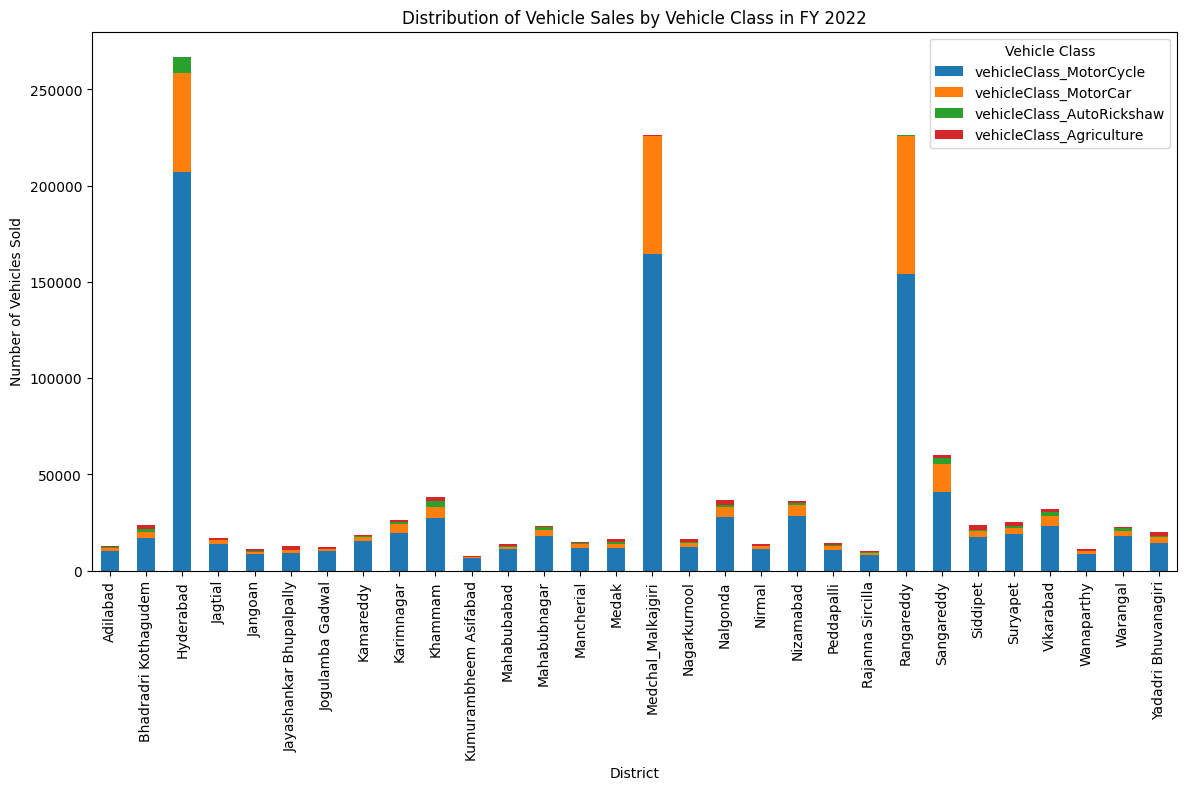

In [7]:
# Group by district and calculate total vehicle sales for FY 2022
df_transport_2022 = df_transport[df_transport['fiscal_year'] == 2022]
vehicle_sales_by_class = df_transport_2022.groupby('district')[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']].sum().reset_index()

print(vehicle_sales_by_class)

# Plotting the distribution
vehicle_sales_by_class.set_index('district').plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribution of Vehicle Sales by Vehicle Class in FY 2022')
plt.xlabel('District')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Vehicle Class')
plt.show()


In [8]:
# Filter for fiscal years 2021 and 2022
df_transport_2021 = df_transport[df_transport['fiscal_year'] == 2021]
df_transport_2022 = df_transport[df_transport['fiscal_year'] == 2022]

# Group by district and calculate total vehicle sales by fuel type
sales_2021 = df_transport_2021.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum().reset_index()
sales_2022 = df_transport_2022.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum().reset_index()

# Calculate growth
sales_growth = sales_2022.merge(sales_2021, on='district', suffixes=('_2022', '_2021'))
sales_growth['growth_petrol'] = (sales_growth['fuel_type_petrol_2022'] - sales_growth['fuel_type_petrol_2021']) / sales_growth['fuel_type_petrol_2021'] * 100
sales_growth['growth_diesel'] = (sales_growth['fuel_type_diesel_2022'] - sales_growth['fuel_type_diesel_2021']) / sales_growth['fuel_type_diesel_2021'] * 100
sales_growth['growth_electric'] = (sales_growth['fuel_type_electric_2022'] - sales_growth['fuel_type_electric_2021']) / sales_growth['fuel_type_electric_2021'] * 100

# Top 3 and bottom 3 districts for each fuel type
top_3_petrol = sales_growth.sort_values(by='growth_petrol', ascending=False).head(3)
bottom_3_petrol = sales_growth.sort_values(by='growth_petrol', ascending=True).head(3)
top_3_diesel = sales_growth.sort_values(by='growth_diesel', ascending=False).head(3)
bottom_3_diesel = sales_growth.sort_values(by='growth_diesel', ascending=True).head(3)
top_3_electric = sales_growth.sort_values(by='growth_electric', ascending=False).head(3)
bottom_3_electric = sales_growth.sort_values(by='growth_electric', ascending=True).head(3)

print("Top 3 Petrol Growth Districts:\n", top_3_petrol)
print("Bottom 3 Petrol Growth Districts:\n", bottom_3_petrol)
print("Top 3 Diesel Growth Districts:\n", top_3_diesel)
print("Bottom 3 Diesel Growth Districts:\n", bottom_3_diesel)
print("Top 3 Electric Growth Districts:\n", top_3_electric)
print("Bottom 3 Electric Growth Districts:\n", bottom_3_electric)


Top 3 Petrol Growth Districts:
               district  fuel_type_petrol_2022  fuel_type_diesel_2022  \
22          Rangareddy                 200289                  27843   
2            Hyderabad                 231166                  20019   
15  Medchal_Malkajgiri                 200121                  27592   

    fuel_type_electric_2022  fuel_type_petrol_2021  fuel_type_diesel_2021  \
22                    13606                 184204                  24711   
2                     20026                 228817                  21195   
15                    13716                 201947                  27153   

    fuel_type_electric_2021  growth_petrol  growth_diesel  growth_electric  
22                     5918       8.732167      12.674517       129.908753  
2                      8929       1.026585      -5.548478       124.280435  
15                     7086      -0.904198       1.616764        93.564776  
Bottom 3 Petrol Growth Districts:
     district  fuel_type_pet

dist_code,month,sector,investment in cr,number_of_employees

In [9]:
# Filter for fiscal year 2022
df_iPASS_2022 = df_iPASS[df_iPASS['fiscal_year'] == 2022]

# Group by sector and calculate total investment
top_sectors_2022 = df_iPASS_2022.groupby('sector')['investment in cr'].sum().reset_index().sort_values(by='investment in cr', ascending=False).head(5)
print(top_sectors_2022)


                                sector  investment in cr
12                  Plastic and Rubber         1599.1432
1                           Automobile         1254.2690
4   Electrical and Electronic Products          218.8307
13                                 R&D          208.8731
9                               Others          190.8791


In [10]:
# Filter for fiscal years 2019 to 2022
df_iPASS_2019_2022 = df_iPASS[(df_iPASS['fiscal_year'] >= 2019) & (df_iPASS['fiscal_year'] <= 2022)]

# Group by district and calculate total investment
top_districts_2019_2022 = df_iPASS_2019_2022.groupby('district')['investment in cr'].sum().reset_index().sort_values(by='investment in cr', ascending=False).head(3)
print(top_districts_2019_2022)


      district  investment in cr
26  Sangareddy         3847.0294
25  Rangareddy         1919.1634
20  Narayanpet          866.1732


                           fuel_type_petrol  fuel_type_diesel  \
fuel_type_petrol                   1.000000          0.892273   
fuel_type_diesel                   0.892273          1.000000   
fuel_type_electric                 0.598413          0.471648   
fuel_type_others                   0.633747          0.495163   
vehicleClass_MotorCycle            0.994915          0.886551   
vehicleClass_MotorCar              0.934615          0.846029   
vehicleClass_AutoRickshaw          0.426424          0.386609   
vehicleClass_Agriculture          -0.162438          0.031637   
vehicleClass_others                0.850965          0.926530   
seatCapacity_1_to_3                0.994877          0.902941   
seatCapacity_4_to_6                0.955493          0.873019   
seatCapacity_above_6               0.927755          0.874602   
Brand_new_vehicles                 0.998052          0.913831   
Pre-owned_vehicles                 0.947630          0.816069   
category_Non-Transport   

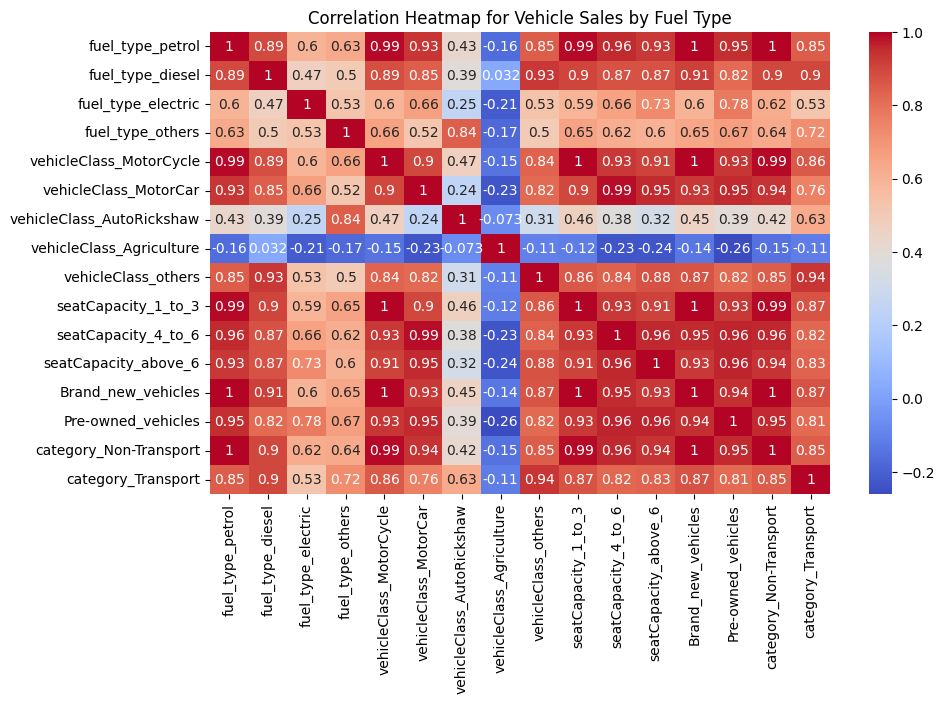

In [11]:
trans_cor = fact_transport[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric','fuel_type_others','vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture','vehicleClass_others','seatCapacity_1_to_3','seatCapacity_4_to_6','seatCapacity_above_6','Brand_new_vehicles','Pre-owned_vehicles','category_Non-Transport','category_Transport']].corr()
print(trans_cor)

plt.figure(figsize=(10, 6))
sns.heatmap(trans_cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Vehicle Sales by Fuel Type')
plt.show()


                          dist_code  documents_registered_rev  \
dist_code                  1.000000                 -0.335146   
documents_registered_rev  -0.335146                  1.000000   
estamps_challans_rev      -0.337337                  0.997879   
total_vehicle_sales       -0.246174                  0.656527   
investment in cr          -0.237329                  0.503403   

                          estamps_challans_rev  total_vehicle_sales  \
dist_code                            -0.337337            -0.246174   
documents_registered_rev              0.997879             0.656527   
estamps_challans_rev                  1.000000             0.672955   
total_vehicle_sales                   0.672955             1.000000   
investment in cr                      0.497490             0.719067   

                          investment in cr  
dist_code                        -0.237329  
documents_registered_rev          0.503403  
estamps_challans_rev              0.497490  
to

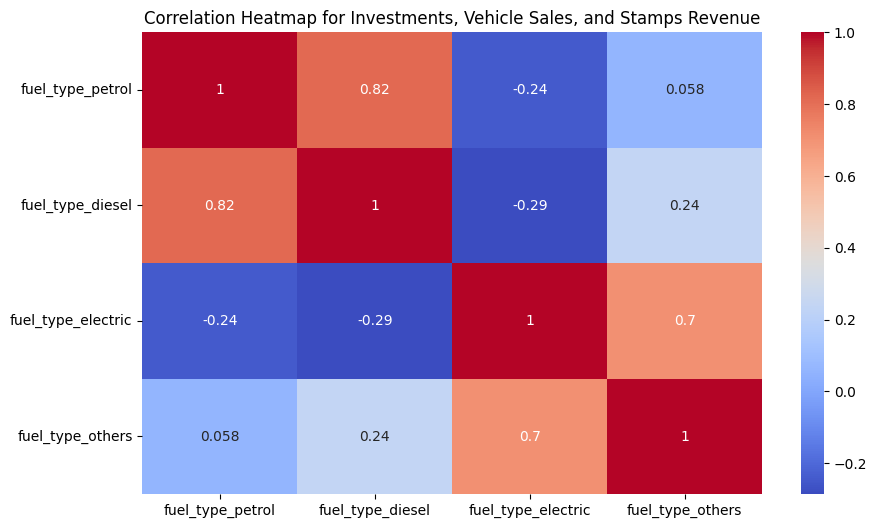

In [15]:
# Merge datasets for FY 2021-2022
df_merged = df_stamps.merge(df_transport, on=['dist_code', 'fiscal_year', 'month'], suffixes=('_stamps', '_transport'), how="inner", validate="many_to_many").merge(df_iPASS, on=['dist_code', 'fiscal_year', 'month'], suffixes=('', '_iPASS'), how="inner", validate="many_to_many")

# Add total_vehicle_sales column to df_transport
df_merged['total_vehicle_sales'] = df_transport['Brand_new_vehicles'] + df_transport['Pre-owned_vehicles']

# Group by district and calculate totals
df_grouped = df_merged.groupby('dist_code')[['documents_registered_rev', 'estamps_challans_rev', 'total_vehicle_sales', 'investment in cr']].sum().reset_index()

# Calculate correlations
grouped_cor = df_grouped.corr()
print(grouped_cor)

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Investments, Vehicle Sales, and Stamps Revenue')
plt.show()


In [16]:
# Group by sector and district, and calculate total investment
sector_growth_2022 = df_iPASS_2022.groupby(['sector', 'district'])['investment in cr'].sum().reset_index()

# Identify sectors with substantial growth in multiple districts
substantial_growth_sectors = sector_growth_2022[sector_growth_2022['investment in cr'] > sector_growth_2022['investment in cr'].mean()]

print(substantial_growth_sectors)


                                sector            district  investment in cr
3                           Automobile          Sangareddy         1254.2690
26  Electrical and Electronic Products          Sangareddy          208.8307
65                              Others        Mahabubnagar          113.2914
67                              Others  Medchal_Malkajgiri           53.2862
77       Pharmaceuticals and Chemicals        Mahabubnagar           75.0000
82       Pharmaceuticals and Chemicals          Sangareddy           50.5598
87                  Plastic and Rubber          Sangareddy         1553.0000
93                                 R&D          Sangareddy          188.0200


sector      Agro based incl Cold Storages  Automobile  Beverages  \
month                                                              
2020-01-01                        21.7675         NaN     1.2041   
2021-01-01                        22.3632         NaN     3.1260   
2022-01-01                        12.8118         NaN   852.9900   
2023-01-01                        23.9732    1254.269     4.2980   

sector      Cement, Cement & Concrete Products, Fly Ash Bricks  \
month                                                            
2020-01-01                                            13.0032    
2021-01-01                                            12.3758    
2022-01-01                                             5.1903    
2023-01-01                                             9.0316    

sector      Electrical and Electronic Products  Engineering  \
month                                                         
2020-01-01                             19.4313      52.4474   
2021-

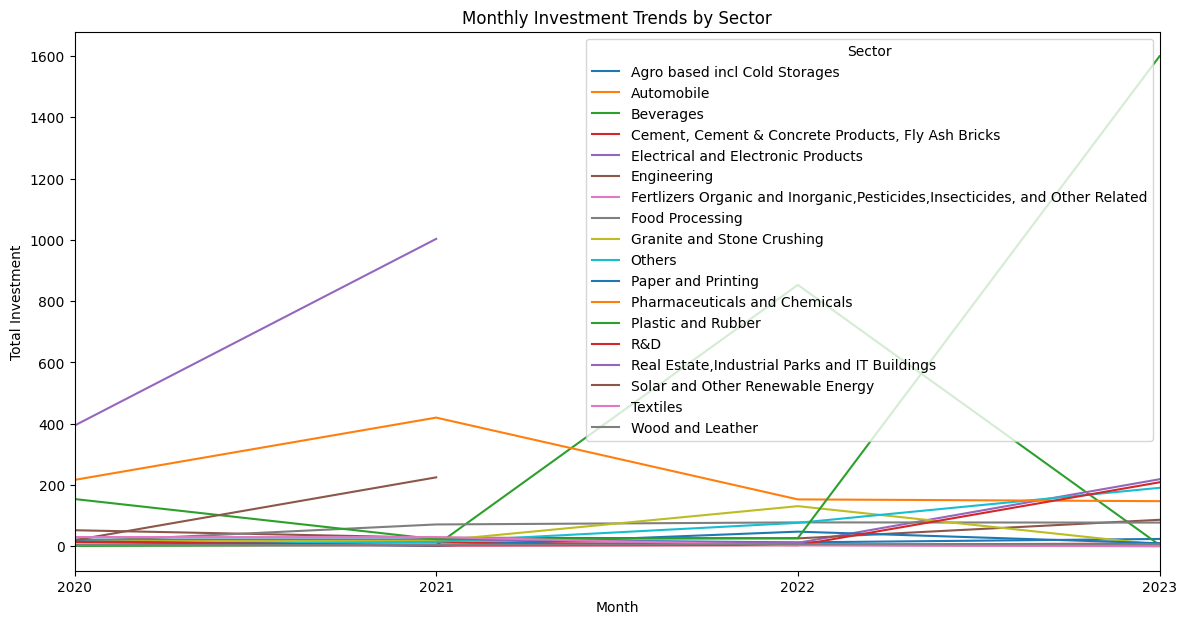

In [17]:
# Group by month and sector, and calculate total investment
monthly_investments = df_iPASS.groupby(['month', 'sector'])['investment in cr'].sum().reset_index()

# Pivot table to visualize investments across months
pivot_table_investments = monthly_investments.pivot(index='month', columns='sector', values='investment in cr')
print(pivot_table_investments)

# Plotting the trends
pivot_table_investments.plot(figsize=(14, 7))
plt.title('Monthly Investment Trends by Sector')
plt.xlabel('Month')
plt.ylabel('Total Investment')
plt.legend(title='Sector')
plt.show()
